In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cmorphosnakes
from pathlib import Path
import imageio
import json

from cmorphosnakes import Snakes

### Info

The module is made to be indentical to the morphological snakes in skikit image but using fast marching instead of binary operators to do the propagation.

C:\Users\axela\AppData\Local\Temp\ipykernel_11592\3466962180.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(PATH_IMG_CAMERA)/255.0


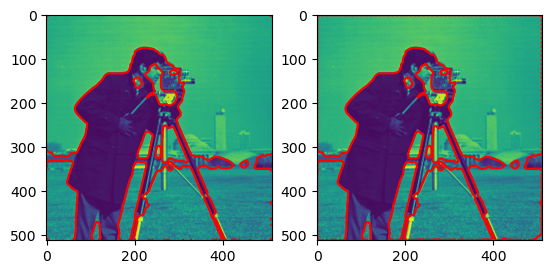

In [3]:
from skimage.segmentation import morphological_chan_vese
from cmorphosnakes import morphological_chan_vese_fm
PATH_IMG_CAMERA = 'images/camera.png'
img = imageio.imread(PATH_IMG_CAMERA)/255.0
ls_ref = morphological_chan_vese(img, 35, smoothing=3, lambda1=1, lambda2=1)
ls_fm = cmorphosnakes.morphological_chan_vese_fm(img, 35, smoothing=3, lambda1=1, lambda2=1)

f, (ax1,ax2)= plt.subplots(ncols = 2)
ax1.imshow(img)
ax2.imshow(img)

ax1.contour(ls_ref, [0.5], colors='r')
ax2.contour(ls_fm, [0.5], colors='r')


In [4]:
%timeit ls_ref = morphological_chan_vese(img, 35, smoothing=3, lambda1=1, lambda2=1)
%timeit ls_fm = morphological_chan_vese_fm(img, 35, smoothing=3, lambda1=1, lambda2=1)


2.73 s ± 140 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
126 ms ± 8.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [5]:
from cmorphosnakes.morphsnakes import circle_level_set

PATH_ARRAY_CONFOCAL = 'images/confocal.npy'
img = np.load(PATH_ARRAY_CONFOCAL)
init_ls = circle_level_set(img.shape, (30, 50, 80), 25)
num_iters = 10
kwargs = {'iterations':10, 'init_level_set':init_ls, 'smoothing':1, 'lambda1':1, 'lambda2':2}
%timeit morphological_chan_vese(img, **kwargs)
%timeit morphological_chan_vese_fm(img, **kwargs)





<magic-timeit>:1: FutureWarning: `iterations` is a deprecated argument name for `morphological_chan_vese`. It will be removed in version 1.0. Please use `num_iter` instead.


3.67 s ± 789 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
75.6 ms ± 1.12 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Class
Module also provides a class wrapper

In [ ]:
snakes = cmorphosnakes.Snakes(img, init_ls)
# calling the steps separately
snakes.smooth()
snakes.evolve()
# iterate 

f, (ax1,ax2)= plt.subplots(ncols = 2)
snakes.iterate(20)
ax1.imshow(img[img.shape[0]//2,:,:])
ax1.contour(snakes.level_set[img.shape[0]//2,:,:],colors='r')

snakes.iterate(40)
ax2.imshow(img[img.shape[0]//2,:,:])
ax2.contour(snakes.level_set[img.shape[0]//2,:,:],colors='r')

In [7]:
# check time of single iteration
%timeit snakes.iterate(1)

13.6 ms ± 161 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
